In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df.shape

(100, 4)

In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


Step 0: Preprocess + EDA + Feature Selection,
Step 1: Extract input and output cols,
Step 2: Scale the values,
Step 3: Train test split(Cross Validation),
Step 4: Train the model,
Step 5: Evaluate the model/model selection,
Step 6: Deploy the model




In [9]:
import matplotlib.pyplot as plt

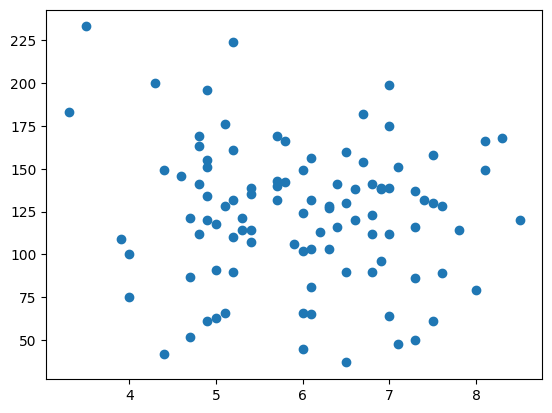

In [10]:
plt.scatter(df['cgpa'], df['iq'])

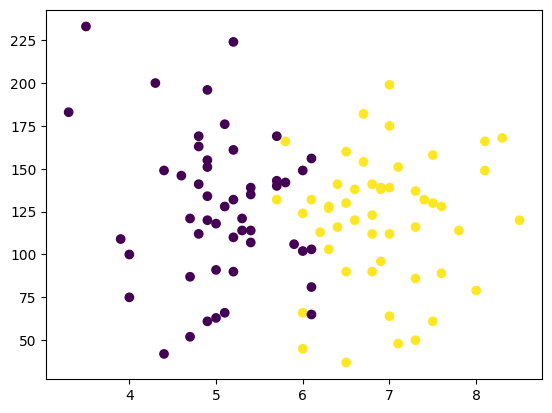

In [11]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [12]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [13]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [14]:
y.shape

(100,)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [16]:
X_train

,cgpa,iq
31,3.9,109.0
94,4.7,52.0
13,6.4,116.0
70,6.3,127.0
96,4.4,42.0
...,...,...
5,7.1,48.0
79,6.5,90.0
3,7.4,132.0
38,6.5,160.0


In [17]:
y_train

,placement
31,0
94,0
13,1
70,1
96,0
...,...
5,1
79,1
3,1
38,1


In [18]:
X_test

,cgpa,iq
20,6.6,120.0
25,5.0,91.0
49,5.4,135.0
88,4.4,149.0
23,4.7,87.0
92,5.2,110.0
29,7.0,112.0
1,5.9,106.0
82,6.5,37.0
39,4.6,146.0


In [19]:
X_test

,cgpa,iq
20,6.6,120.0
25,5.0,91.0
49,5.4,135.0
88,4.4,149.0
23,4.7,87.0
92,5.2,110.0
29,7.0,112.0
1,5.9,106.0
82,6.5,37.0
39,4.6,146.0


In [20]:
!pip install sklearn.preprocessing

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_train

array([[-1.85909948, -0.40150369],
       [-1.16482997, -1.81711462],
       [ 0.31049276, -0.22765673],
       [ 0.22370907,  0.04553135],
       [-1.42518103, -2.06546742],
       [-2.20623424,  2.67807098],
       [ 1.09154596, -0.97271512],
       [ 0.65762751, -0.873374  ],
       [ 1.26511334, -1.5935971 ],
       [ 1.35189703, -0.89820928],
       [ 1.69903179, -1.14656207],
       [-0.29699307,  1.08861309],
       [-1.07804628,  0.39322526],
       [ 1.09154596,  0.29388414],
       [-0.29699307,  0.44289582],
       [ 0.13692538, -0.30216257],
       [-0.036642  , -1.46942071],
       [-0.21020938,  1.01410725],
       [-0.036642  , -0.57535064],
       [ 0.83119489,  1.23762476],
       [-0.9044789 , -1.54392654],
       [ 1.09154596, -0.22765673],
       [ 1.35189703,  0.07036663],
       [ 0.91797858,  0.64157805],
       [ 0.22370907,  0.07036663],
       [-0.036642  , -0.02897449],
       [ 2.13295024, -0.12831561],
       [-1.77231579, -0.6250212 ],
       [-0.99126259,

In [26]:
X_test = scaler.transform(X_test)

In [27]:
X_test

array([[ 0.48406013, -0.12831561],
       [-0.9044789 , -0.84853872],
       [-0.55734414,  0.24421358],
       [-1.42518103,  0.5919075 ],
       [-1.16482997, -0.94787984],
       [-0.73091152, -0.37666841],
       [ 0.83119489, -0.32699785],
       [-0.12342569, -0.47600952],
       [ 0.39727645, -2.18964381],
       [-1.25161366,  0.51740166]])

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression()

In [31]:
# model training
clf.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = clf.predict(X_test)

In [38]:
y_test

,placement
20,1
25,0
49,0
88,0
23,0
92,0
29,1
1,0
82,1
39,0


In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, y_pred)

1.0

In [41]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

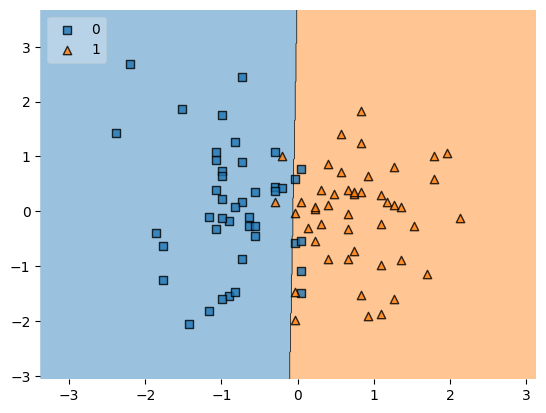

In [43]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [44]:
import pickle

In [45]:
pickle.dump(clf,open('model.pkl', 'wb'))